<a href="https://colab.research.google.com/github/harishmohan83/text-util-service/blob/master/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import seaborn as sea

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn import model_selection
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report
from timeit import default_timer as timer

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/assignment1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment1/diabetes.csv')

/content/drive/MyDrive/Colab Notebooks/assignment1/diabetes.csv
/content/drive/MyDrive/Colab Notebooks/assignment1/.DS_Store
/content/drive/MyDrive/Colab Notebooks/assignment1/winequality-white.csv
/content/drive/MyDrive/Colab Notebooks/assignment1/winequality-red.csv


In [ ]:
# !pip install six
# !pip install scipy
# !pip install sklearn


In [ ]:
# !pip install -e git+git://github.com/hiive/mlrose#egg=mlrose-hiive
# !pip install six
# !pip install mlrose

!pip install joblib==1.2.0
!pip install mlrose-hiive
!pip install chess

In [2]:
# import six
import sys
import seaborn as sea
# sys.modules['sklearn.externals.six'] = six
import mlrose_hiive as mlrose

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from mlrose_hiive import QueensGenerator, KnapsackGenerator, ContinuousPeaksGenerator, MaxKColorGenerator, FlipFlopGenerator
from IPython.core.display import display, HTML
import chess
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, NNGSRunner
import string
from ast import literal_eval

In [ ]:
# def queens_max(state):
#     fitness = 0

#     for i in range(len(state) - 1):
#       for j in range(i + 1, len(state)):
#         if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
#           fitness += 1
#     return fitness

# fitness_cust = mlrose.CustomFitness(queens_max)

# # fitness_fn = mlrose.Queens()
# problem_cust = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize=True, max_val=8)
# init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# start_time = timer()
# best_state, best_fitness, fit_curve = mlrose.random_hill_climb(problem_cust, max_attempts = 1000, max_iters = np.inf, restarts=0, init_state = init_state,
#                                                       curve=True, random_state = 10)
# elapsed_time = timer() - start_time
# print('Elapsed time: ', elapsed_time)
# print('Best state: ', best_state)
# print('Best fitness: ', best_fitness)
# plt.plot(fit_curve[:, 0])
# plt.ylabel('Fitness')
# plt.xlabel('Iterations')
# # plt.xticks(np.arange(0, 1001, 100))
# plt.show()

# plt.plot(fit_curve[:, 1])
# plt.ylabel('Fevals')
# plt.xlabel('Iterations')
# # plt.xticks(np.arange(0, 1001, 100))
# plt.show()

In [ ]:
problem = QueensGenerator().generate(seed=123, size=8)
state = problem.get_state()
print(state)
board_layout = '/'.join([''.join(([str(s)] if s > 0 else []) + ['Q'] + ([str((7-s))] if s < 7 else [])) for s in state])
board = chess.Board(board_layout)
# board

In [ ]:
problem_8 = QueensGenerator().generate(seed=1234, size=8)
rhc_8 = RHCRunner(problem=problem_8,
              experiment_name='queens8_rhc',
              output_directory=None,
              seed=1234,
              iteration_list=2 ** np.arange(15),
              restart_list=[1],
              max_attempts=1000)

df_run_stats, df_run_curves = rhc_8.run()



In [ ]:
# curves = df_run_curves[df_run_curves['Restarts'] == 1]
# print(curves)
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 1001, 100))
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [ ]:
# minimum_evaluations = best_runs['Iteration'].min()
# best_curve_run = best_runs[best_runs['Iteration'] == minimum_evaluations]
# HTML(best_curve_run.to_html())

In [ ]:
problem_9 = QueensGenerator().generate(seed=123, size=9)
rhc_9 = RHCRunner(problem=problem_9,
              experiment_name='queens9_rhc',
              output_directory=None,
              seed=1234,
              iteration_list=2 ** np.arange(15),
              restart_list=[10],
              max_attempts=1000)

df_run_stats, df_run_curves = rhc_9.run()

In [ ]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 1001, 100))
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 1001, 100))
# plt.show()

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [ ]:
problem_10 = QueensGenerator().generate(seed=123, size=10)
rhc_10 = RHCRunner(problem=problem_10,
              experiment_name='queens10_rhc',
              output_directory=None,
              seed=1234,
              iteration_list=2 ** np.arange(15),
              restart_list=[10],
              max_attempts=5000)

df_run_stats, df_run_curves = rhc_10.run()



In [ ]:
# curves = df_run_curves[df_run_curves['Restarts'] == 10]
# print(curves)
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 1001, 100))
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [ ]:
# HTML(df_run_stats[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())



In [ ]:
problem_9 = QueensGenerator().generate(seed=123, size=9)

rhc_9 = RHCRunner(problem=problem_9,
              experiment_name='queens9_rhc',
              output_directory=None,
              seed=1234,
              iteration_list=[2500],
              restart_list=[10],
              max_attempts=1000)
start_time = timer()
df_run_stats, df_run_curves = rhc_9.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [289]:
problem_10 = QueensGenerator().generate(seed=123, size=10)

rhc_10 = RHCRunner(problem=problem_10,
              experiment_name='queens10_rhc',
              output_directory=None,
              seed=1234,
              iteration_list=[2500],
              restart_list=[10],
              max_attempts=1000)
start_time = timer()
df_run_stats, df_run_curves = rhc_10.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  51.45540016999803


In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [ ]:
# fitness = mlrose.Queens()
# problem_cust = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize=False, max_val=9)
# decay = mlrose.ExpDecay(init_temp=1)
# init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
# start_time = timer()
# best_state, best_fitness, fit_curve = mlrose.simulated_annealing(problem_cust, schedule=decay, max_attempts = 1000, max_iters = 1000, init_state = init_state,
#                                                       curve=True, random_state = 123)
# elapsed_time = timer() - start_time
# print('Elapsed time: ', elapsed_time)
# print('Best state: ', best_state)
# print('Best fitness: ', best_fitness)

# plt.plot(fit_curve[:, 0] * -1)
# plt.ylabel('Fitness')
# plt.xlabel('Iterations')
# # plt.xticks(np.arange(0, 1000, 100))
# plt.show()

In [ ]:
problem_8 = QueensGenerator().generate(seed=123, size=8)
sa_8 = SARunner(problem=problem_8,
              experiment_name='queens8_sa',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              max_attempts=1000,
              temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0],
              decay_list=[mlrose.ExpDecay])

# the two data frames will contain the results
df_run_stats, df_run_curves = sa_8.run()

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [312]:
problem_8 = QueensGenerator().generate(seed=123, size=8)
sa_8 = SARunner(problem=problem_8,
              experiment_name='queens8_sa',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              max_attempts=1000,
              temperature_list=[1.0],
              decay_list=[mlrose.ExpDecay])

# the two data frames will contain the results
df_run_stats, df_run_curves = sa_8.run()

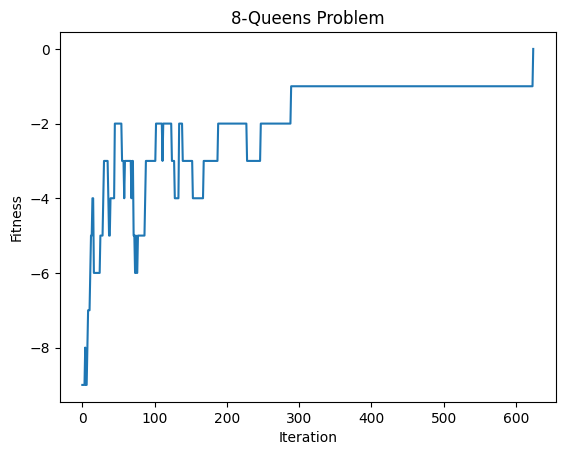

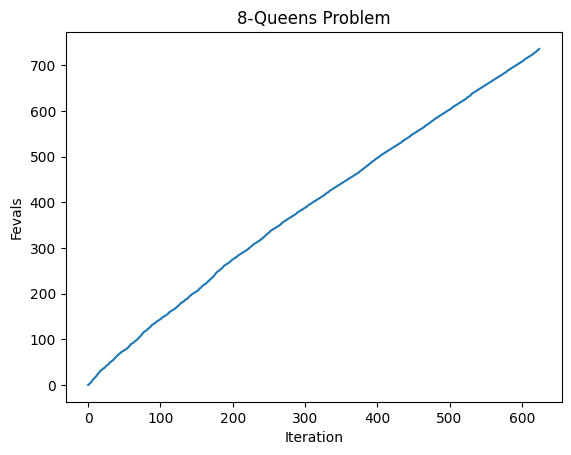

In [313]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.title('8-Queens Problem')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iteration')
plt.title('8-Queens Problem')
plt.show()

In [306]:
problem_10 = QueensGenerator().generate(seed=123, size=10)
sa_10 = SARunner(problem=problem_10,
              experiment_name='queens10_sa',
              output_directory=None,
              seed=123,
              iteration_list=[1000],
              max_attempts=1000,
              temperature_list=[1.0],
              decay_list=[mlrose.ExpDecay])

start_time = timer()
df_run_stats, df_run_curves = sa_10.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)


Elapsed time:  1.0003028939972864


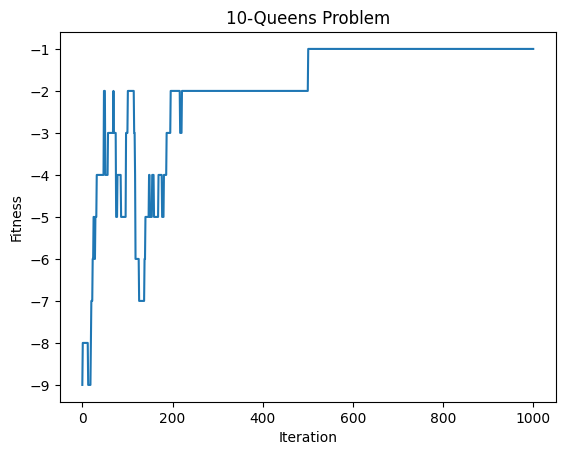

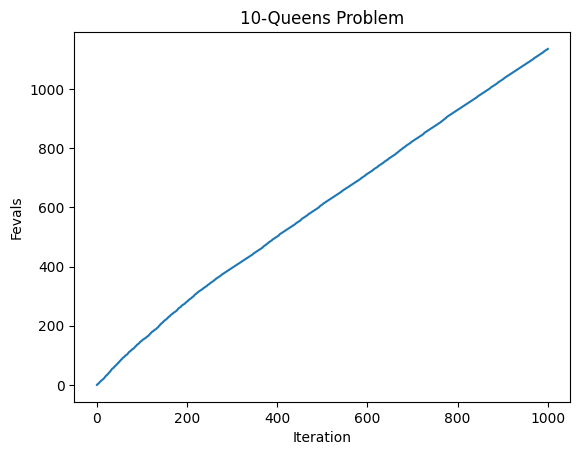

In [307]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.title('10-Queens Problem')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iteration')
plt.title('10-Queens Problem')
plt.show()

In [293]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
308,308,0.134304,0.0,410.0,1.0,1000


In [308]:
problem_15 = QueensGenerator().generate(seed=123, size=15)
sa_15 = SARunner(problem=problem_15,
              experiment_name='queens15_sa',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              max_attempts=1000,
              temperature_list=[0.1],
              decay_list=[mlrose.ExpDecay])


start_time = timer()
df_run_stats, df_run_curves = sa_15.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)


Elapsed time:  1.0834164510015398


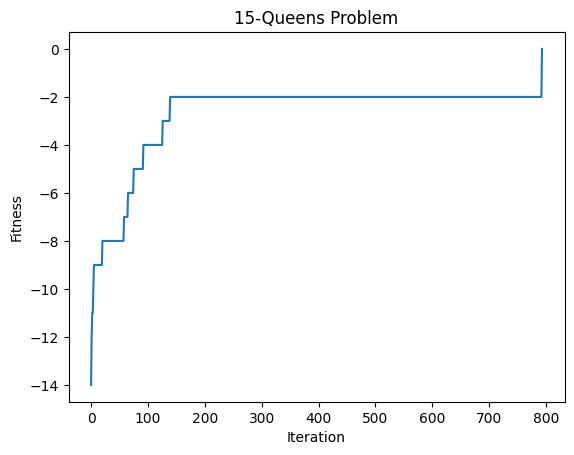

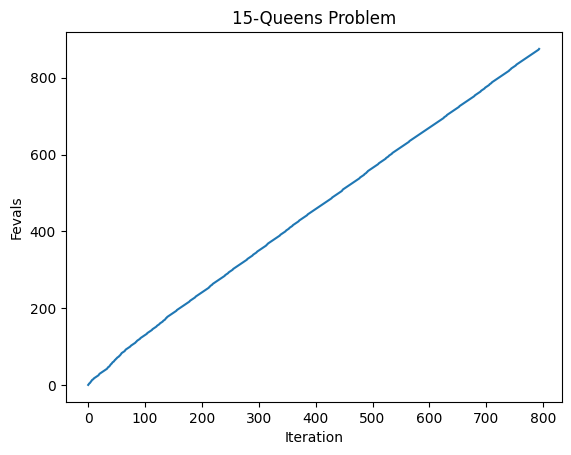

In [310]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.title('15-Queens Problem')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iteration')
plt.title('15-Queens Problem')
plt.show()

In [311]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
793,793,1.064294,0.0,875.0,0.1,1024


In [ ]:
# start_time = timer()
# best_state, best_fitness, fit_curve = mlrose.genetic_alg(problem_cust, pop_size=200, mutation_prob=0.1, max_attempts = 100, max_iters = 100,
#                                                       curve=True, random_state = 1)
# elapsed_time = timer() - start_time
# print('Elapsed time: ', elapsed_time)
# print('Best state: ', best_state)
# print('Best fitness: ', best_fitness)

# plt.plot(fit_curve)
# plt.ylabel('Fitness')
# plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 100, 10))
# plt.show()

In [ ]:
problem_8 = QueensGenerator().generate(seed=123, size=8)
ga_8 = GARunner(problem=problem_8,
              experiment_name='queens8_ga',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10, 20, 50, 100, 200],
              mutation_rates=[0.1, 0.2, 0.5])
df_run_stats, df_run_curves = ga_8.run()

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [314]:
problem_8 = QueensGenerator().generate(seed=123, size=8)
ga_8 = GARunner(problem=problem_8,
              experiment_name='queens8_ga',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10],
              mutation_rates=[0.5])
df_run_stats, df_run_curves = ga_8.run()

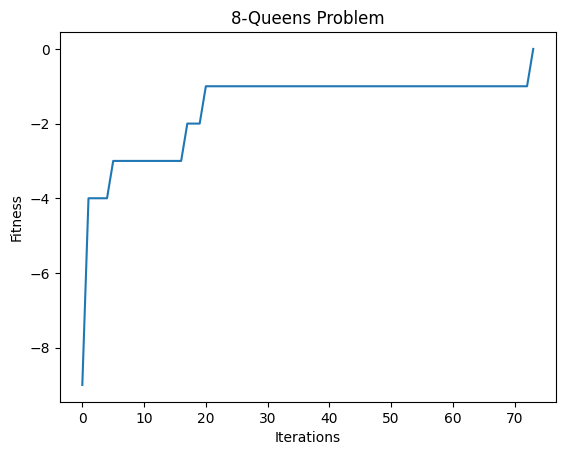

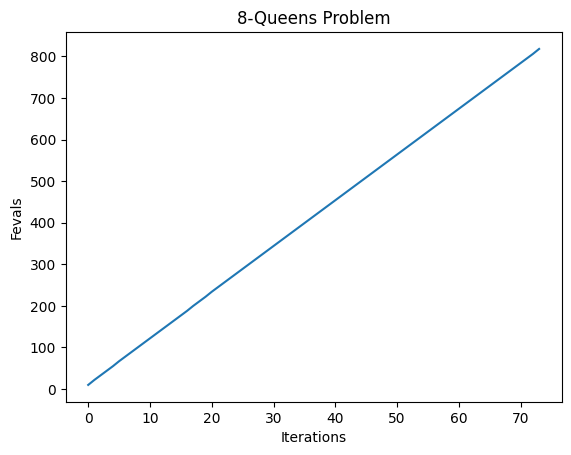

In [315]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('8-Queens Problem')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('8-Queens Problem')
plt.show()

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [316]:
problem_10 = QueensGenerator().generate(seed=123, size=10)
ga_10 = GARunner(problem=problem_10,
              experiment_name='queens10_ga',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[20],
              mutation_rates=[0.5])

start_time = timer()
df_run_stats, df_run_curves = ga_10.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  0.23534224300237838


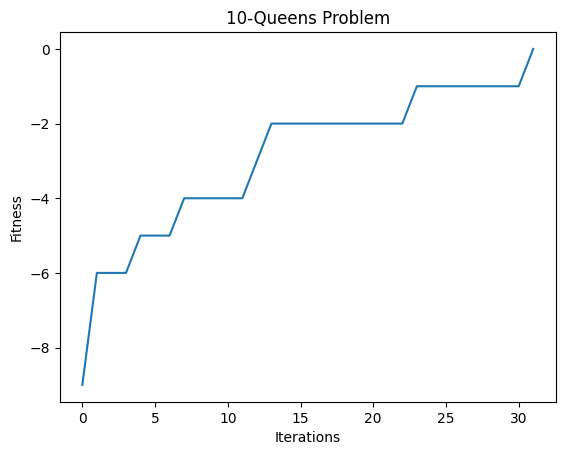

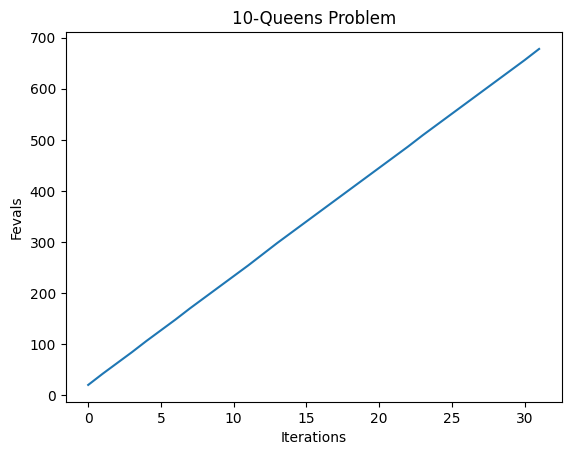

In [317]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('10-Queens Problem')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('10-Queens Problem')
plt.show()

In [ ]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [325]:
problem_15 = QueensGenerator().generate(seed=123, size=15)
ga_15 = GARunner(problem=problem_15,
              experiment_name='queens15_ga',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[20],
              mutation_rates=[0.5])

start_time = timer()
df_run_stats, df_run_curves = ga_15.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  4.121881397000834


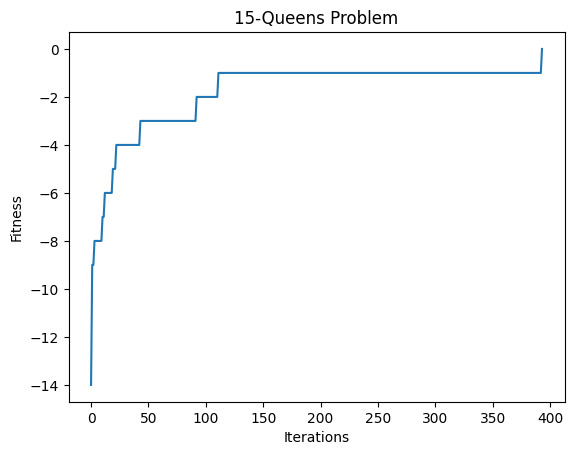

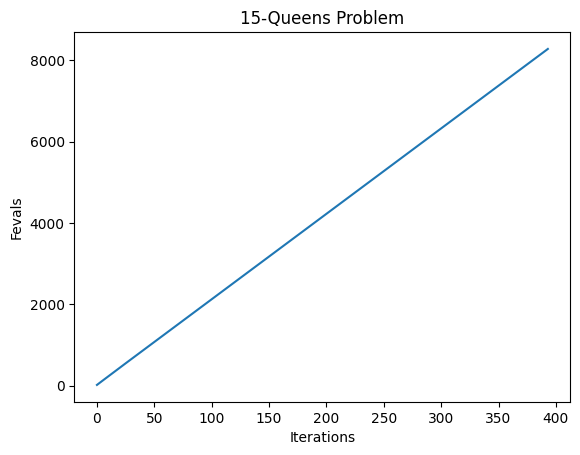

In [327]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('15-Queens Problem')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('15-Queens Problem')
plt.show()

In [328]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
393,393,4.110868,0.0,8283.0,20,0.5,1024


In [ ]:
# start_time = timer()
# best_state, best_fitness, fit_curve = mlrose.mimic(problem_cust, pop_size=200, keep_pct=0.2, max_attempts = 100, max_iters = 100,
#                                                       curve=True, random_state = 1, fast_mimic=True)
# elapsed_time = timer() - start_time
# print('Elapsed time: ', elapsed_time)
# print('Best state: ', best_state)
# print('Best fitness: ', best_fitness)

# plt.plot(fit_curve)
# plt.ylabel('Fitness')
# plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 100, 10))
# plt.show()

In [4]:
problem_8 = QueensGenerator().generate(seed=123, size=8)
mimic_8 = MIMICRunner(problem=problem_8,
              experiment_name='queens8_mimic',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10, 20, 50, 100, 200],
              max_attempts = 100,
              keep_percent_list=[0.1, 0.2, 0.5], fast_mimic=True)
df_run_stats, df_run_curves = mimic_8.run()

In [5]:
best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters,fast_mimic
1339,4,0.162853,0.0,1007.0,False,200,0.2,1024,True


In [ ]:
problem_10 = QueensGenerator().generate(seed=123, size=10)
mimic_10 = MIMICRunner(problem=problem_10,
              experiment_name='queens10_mimic',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10, 20, 50, 100, 200],
              max_attempts = 1000,
              keep_percent_list=[0.1, 0.2, 0.5], fast_mimic=True)
df_run_stats, df_run_curves = mimic_10.run()

best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [ ]:
problem_15 = QueensGenerator().generate(seed=123, size=15)
mimic_15 = MIMICRunner(problem=problem_15,
              experiment_name='queens15_mimic',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10, 20, 50, 100, 200],
              max_attempts = 100,
              keep_percent_list=[0.1, 0.2, 0.5], fast_mimic=True)
df_run_stats, df_run_curves = mimic_15.run()

best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
HTML(best_runs.to_html())

In [4]:
problem_8 = QueensGenerator().generate(seed=123, size=8)
mimic_8 = MIMICRunner(problem=problem_8,
              experiment_name='queens8_mimic',
              output_directory=None,
              seed=123,
              iteration_list=[1000],
              population_sizes=[200],
              max_attempts = 100,
              keep_percent_list=[0.2], fast_mimic=True)
df_run_stats, df_run_curves = mimic_8.run()

best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters,fast_mimic
4,4,1.857746,0.0,1007.0,False,200,0.2,1000,True


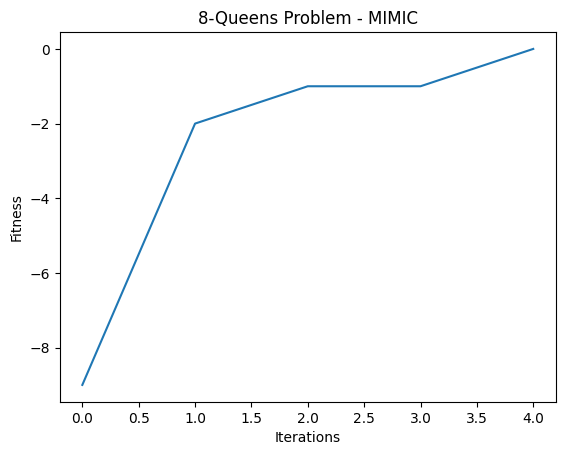

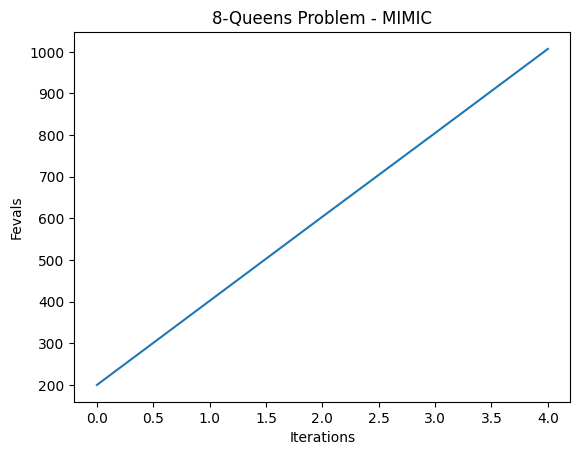

In [5]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('8-Queens Problem - MIMIC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('8-Queens Problem - MIMIC')
plt.show()

In [16]:
problem_10 = QueensGenerator().generate(seed=123, size=10)
mimic_10 = MIMICRunner(problem=problem_10,
              experiment_name='queens10_mimic',
              output_directory=None,
              seed=123,
              iteration_list=[1000],
              population_sizes=[5000],
              max_attempts = 100,
              keep_percent_list=[0.5], fast_mimic=True)
df_run_stats, df_run_curves = mimic_10.run()

best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters,fast_mimic
26,26,43.144445,0.0,135029.0,False,5000,0.5,1024,True


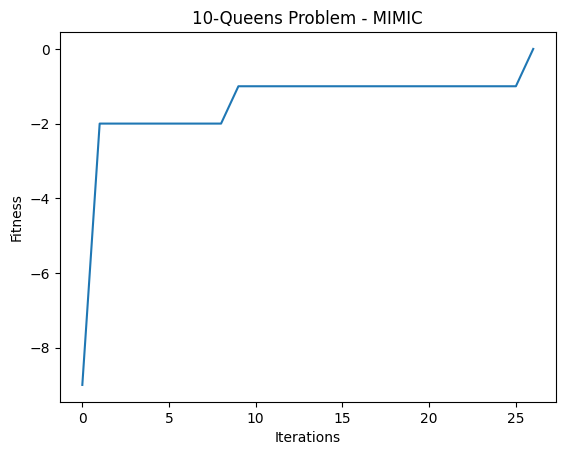

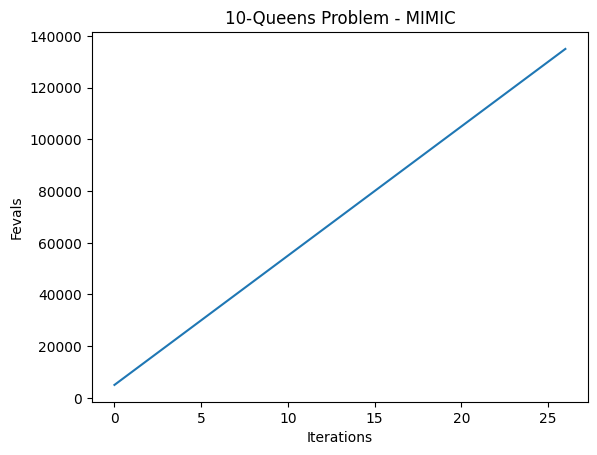

In [17]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('10-Queens Problem - MIMIC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('10-Queens Problem - MIMIC')
plt.show()

In [ ]:
problem_15 = QueensGenerator().generate(seed=123, size=15)
mimic_15 = MIMICRunner(problem=problem_15,
              experiment_name='queens15_mimic',
              output_directory=None,
              seed=123,
              iteration_list=[1000],
              population_sizes=[5000],
              max_attempts = 200,
              keep_percent_list=[0.5], fast_mimic=True)
df_run_stats, df_run_curves = mimic_15.run()

best_fitness = df_run_curves['Fitness'].min()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
HTML(best_runs.to_html())

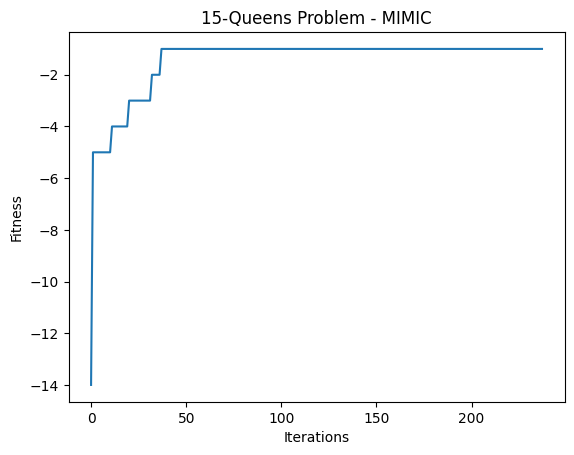

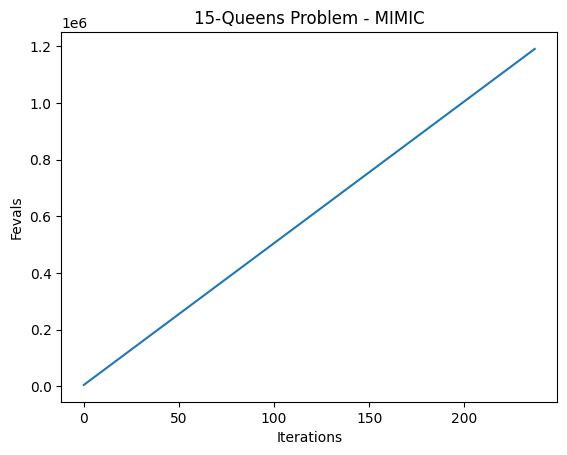

In [9]:
plt.plot(df_run_curves['Fitness'] * -1)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('15-Queens Problem - MIMIC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('15-Queens Problem - MIMIC')
plt.show()

In [11]:
# fitness = mlrose.FourPeaks(t_pct=0.15)
# problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize=True, max_val=2)
# init_state = np.array([1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,\
#                        0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,0,\
#                        0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,\
#                        0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1])


Elapsed time:  0.41423408899936476
Best state:  [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best fitness:  36.0


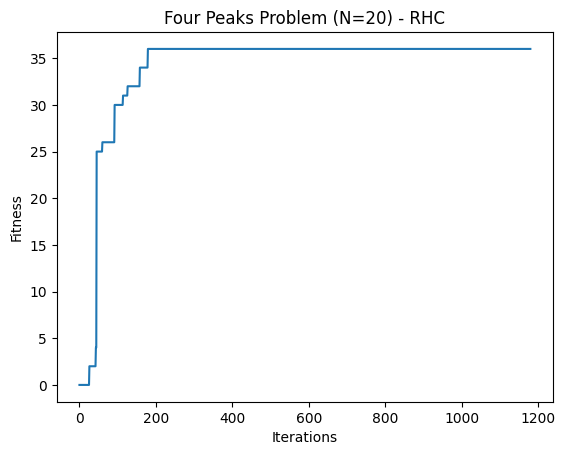

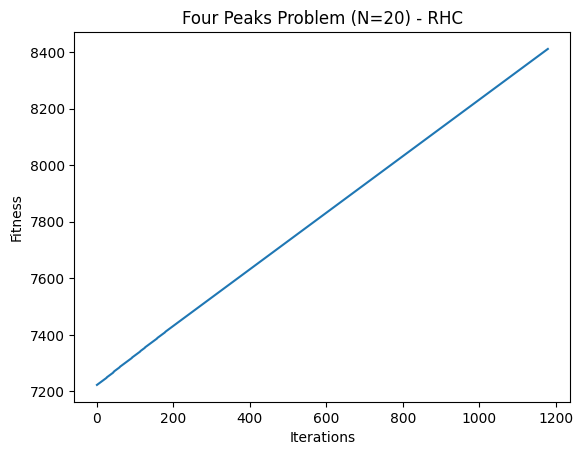

In [56]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.random_hill_climb(problem, max_attempts = 1000, max_iters = 10000, restarts=10,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - RHC')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - RHC')
plt.show()

In [57]:
best_fitness = fit_curve[:, 0].max()
best_runs = fit_curve[fit_curve[:,0] == best_fitness]
minimum_evaluations = best_runs[:, 1].min()
best_curve_run = best_runs[best_runs[:, 1] == minimum_evaluations]
print(best_curve_run)



[[  36. 7411.]]


Elapsed time:  1.3997728810008994
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best fitness:  50.0


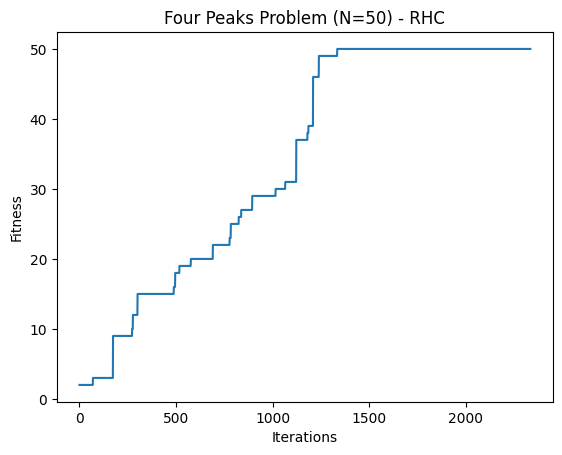

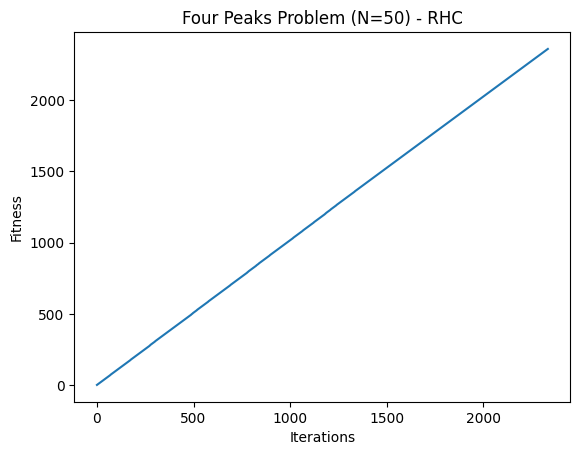

In [71]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_50 = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.random_hill_climb(problem_50, max_attempts = 1000, max_iters = 10000, restarts=10,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - RHC')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - RHC')
plt.show()


In [66]:
best_fitness = fit_curve[:, 0].max()
best_runs = fit_curve[fit_curve[:,0] == best_fitness]
minimum_evaluations = best_runs[:, 1].min()
best_curve_run = best_runs[best_runs[:, 1] == minimum_evaluations]
print(best_curve_run)

[[  50. 1359.]]


Elapsed time:  2.1478816359995108
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best fitness:  100.0


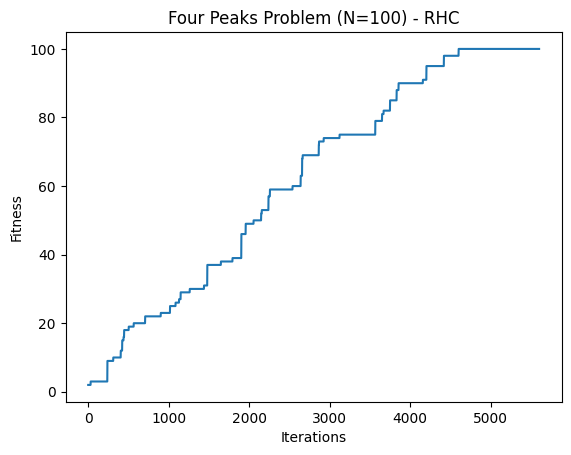

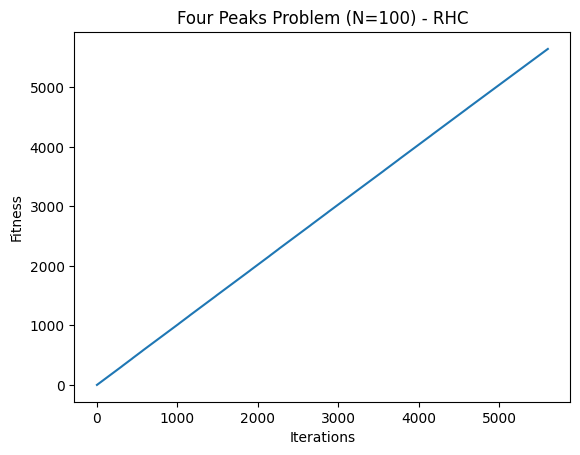

In [72]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_100 = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.random_hill_climb(problem_100, max_attempts = 1000, max_iters = 10000, restarts=10,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - RHC')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - RHC')
plt.show()

In [73]:
best_fitness = fit_curve[:, 0].max()
best_runs = fit_curve[fit_curve[:,0] == best_fitness]
minimum_evaluations = best_runs[:, 1].min()
best_curve_run = best_runs[best_runs[:, 1] == minimum_evaluations]
print(best_curve_run)

[[ 100. 4647.]]


Elapsed time:  0.09594584699880215
Best state:  [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best fitness:  36.0


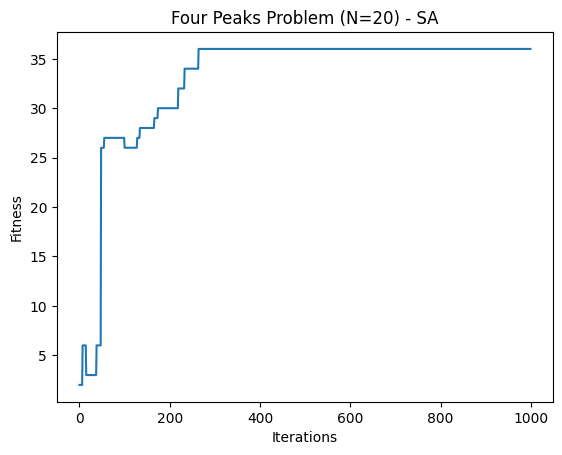

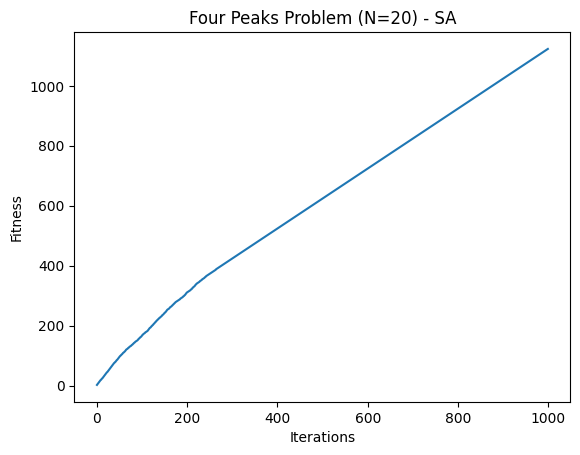

In [80]:
decay = mlrose.ExpDecay(init_temp=1, exp_const=0.005)
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_20 = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.simulated_annealing(problem_20, schedule=decay, max_attempts = 1000, max_iters = 1000,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - SA')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - SA')
plt.show()

Elapsed time:  1.142655867999565
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0]
Best fitness:  91.0


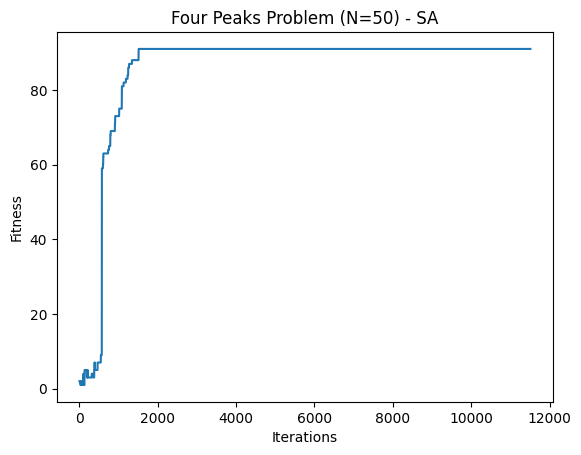

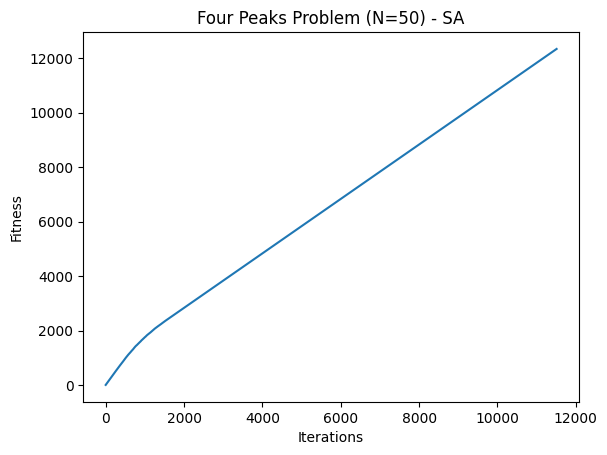

In [101]:
decay = mlrose.ExpDecay(init_temp=5, exp_const=0.005)
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_50 = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.simulated_annealing(problem_50, schedule=decay, max_attempts = 10000, max_iters = 100000,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - SA')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - SA')
plt.show()

Elapsed time:  0.7985640080005396
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best fitness:  100.0


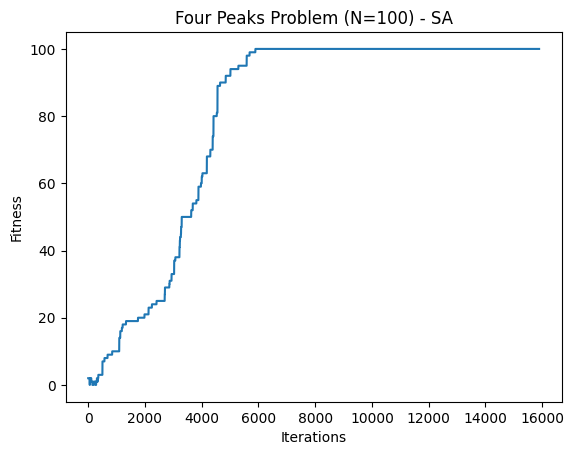

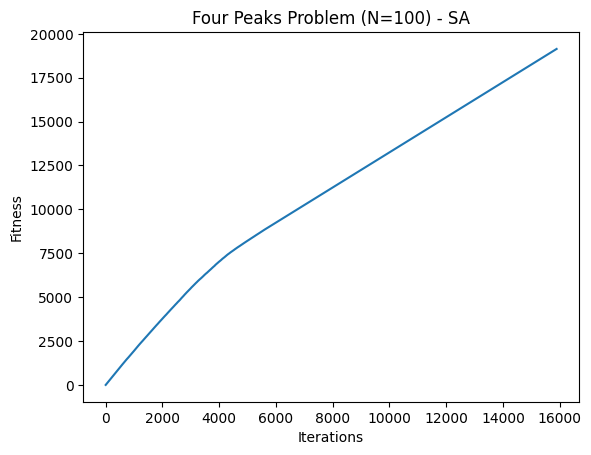

In [103]:
decay = mlrose.ExpDecay(init_temp=5, exp_const=0.005)
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_100 = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.simulated_annealing(problem_100, schedule=decay, max_attempts = 10000, max_iters = 100000,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - SA')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - SA')
plt.show()

In [104]:
best_fitness = fit_curve[:, 0].max()
best_runs = fit_curve[fit_curve[:,0] == best_fitness]
minimum_evaluations = best_runs[:, 1].min()
best_curve_run = best_runs[best_runs[:, 1] == minimum_evaluations]
print(best_curve_run)

[[ 100. 9140.]]


Elapsed time:  10.439494651000132
Best state:  [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best fitness:  36.0


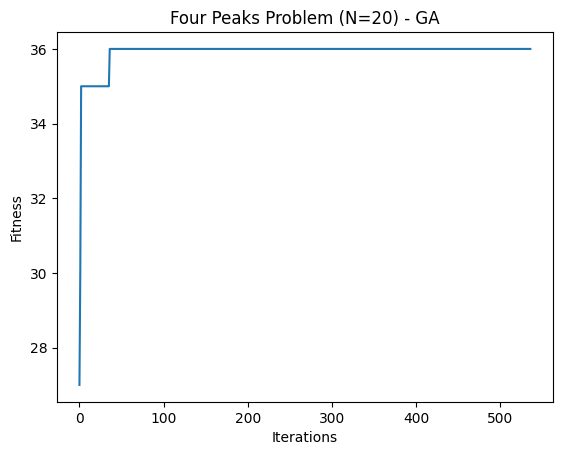

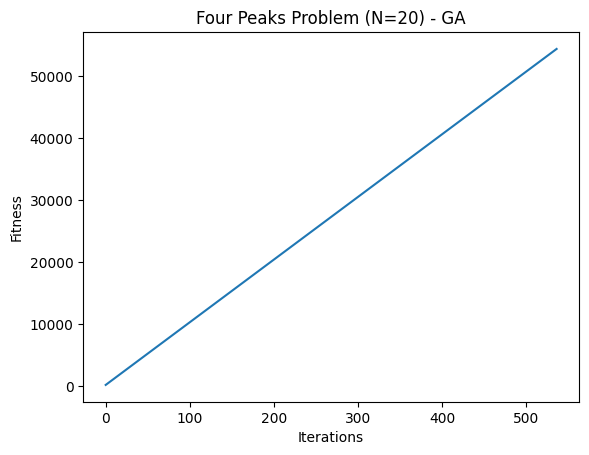

In [106]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_20 = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.genetic_alg(problem_20, pop_size=100, mutation_prob=0.1, max_attempts = 500, max_iters = 1000,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - GA')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - GA')
plt.show()

Elapsed time:  5.093435318000047
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0]
Best fitness:  91.0


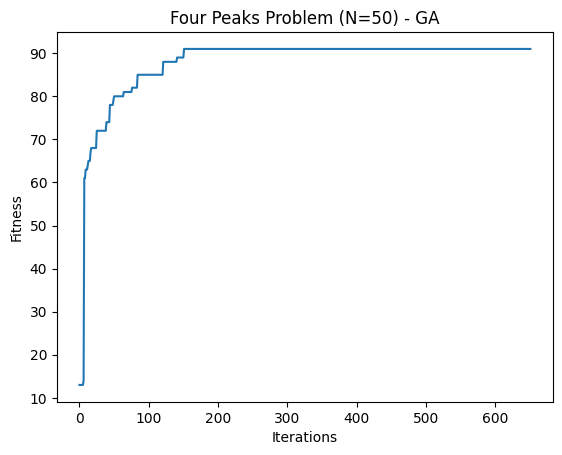

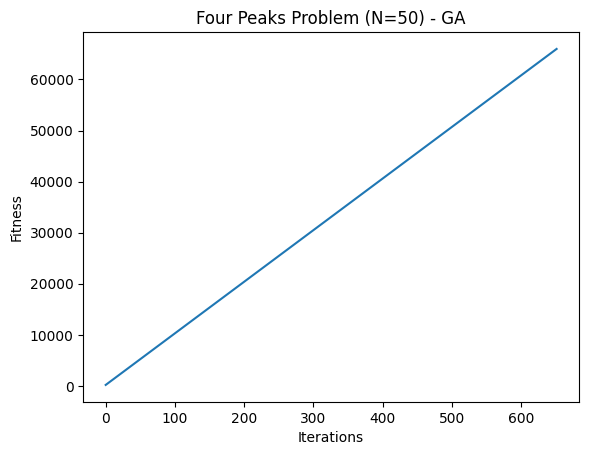

In [107]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_50 = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.genetic_alg(problem_50, pop_size=100, mutation_prob=0.1, max_attempts = 500, max_iters = 1000,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - GA')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - GA')
plt.show()

Elapsed time:  12.114791427000455
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best fitness:  184.0


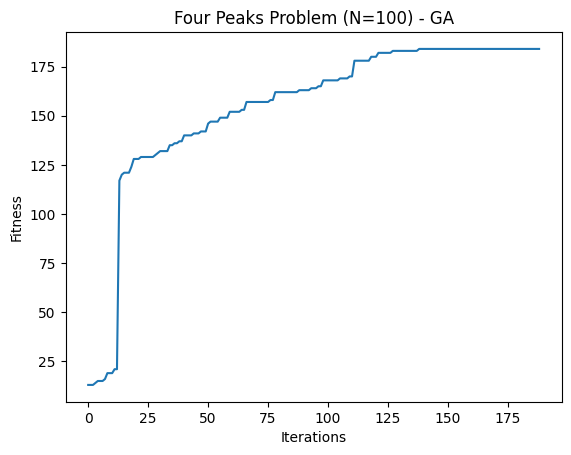

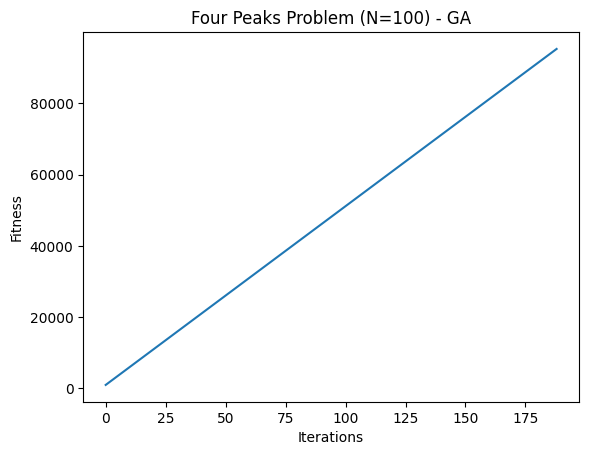

In [115]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_100 = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.genetic_alg(problem_100, pop_size=500, mutation_prob=0.2, max_attempts = 50, max_iters = 500,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - GA')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - GA')
plt.show()

In [116]:
best_fitness = fit_curve[:, 0].max()
best_runs = fit_curve[fit_curve[:,0] == best_fitness]
minimum_evaluations = best_runs[:, 1].min()
best_curve_run = best_runs[best_runs[:, 1] == minimum_evaluations]
print(best_curve_run)

[[  184. 70179.]]


Elapsed time:  18.60159026999827
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
Best fitness:  36.0


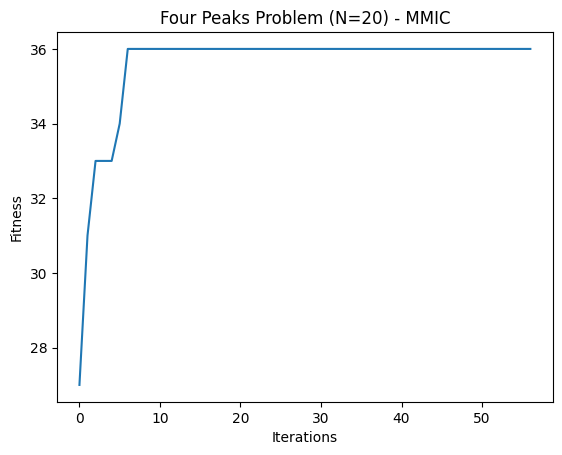

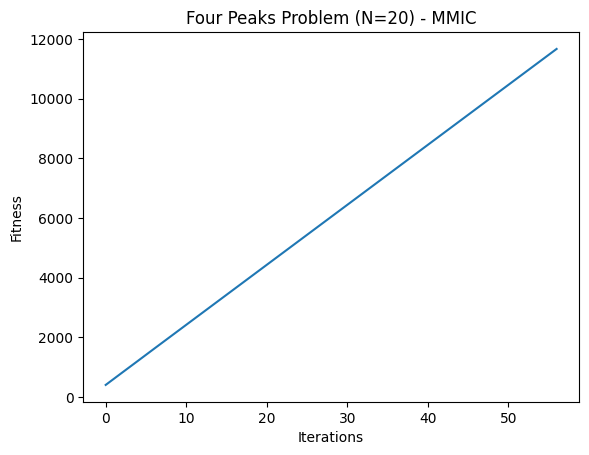

In [119]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_20 = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.mimic(problem_20, pop_size=200, keep_pct=0.2, max_attempts = 50, max_iters = 500,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - MMIC')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=20) - MMIC')
plt.show()

Elapsed time:  110.57469166300143
Best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0]
Best fitness:  79.0


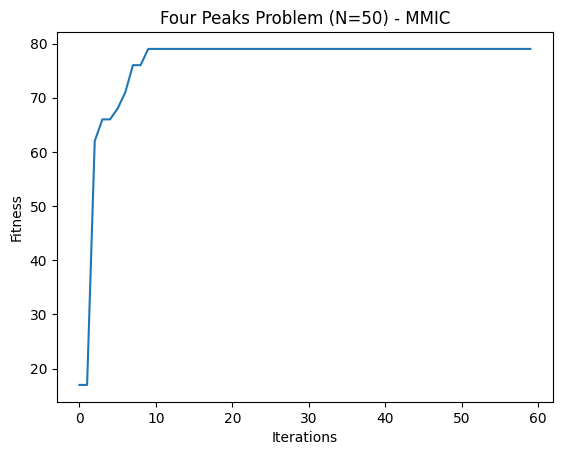

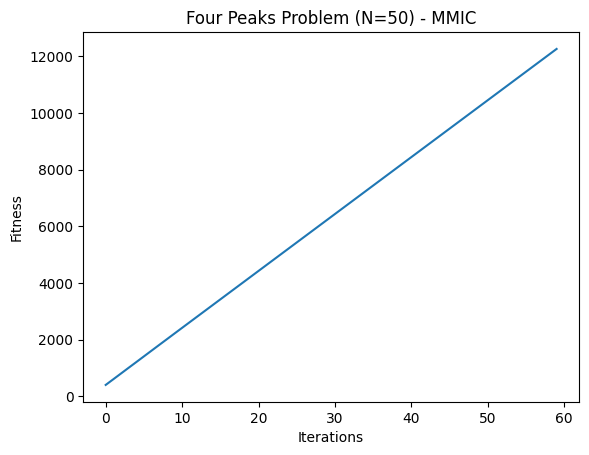

In [120]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_50 = mlrose.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.mimic(problem_50, pop_size=200, keep_pct=0.2, max_attempts = 50, max_iters = 500,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - MMIC')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=50) - MMIC')
plt.show()

In [125]:
fitness = mlrose.FourPeaks(t_pct=0.15)
problem_100 = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)
start_time = timer()
best_state, best_fitness, fit_curve = mlrose.mimic(problem_100, pop_size=5000, keep_pct=0.5, max_attempts = 100, max_iters = 1000,
                                                      curve=True, random_state = 1)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
print('Best state: ', best_state)
print('Best fitness: ', best_fitness)

plt.plot(fit_curve[:, 0])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - MMIC')
plt.show()

plt.plot(fit_curve[:, 1])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Four Peaks Problem (N=100) - MMIC')
plt.show()

KeyboardInterrupt: ignored

In [123]:
best_fitness = fit_curve[:, 0].max()
best_runs = fit_curve[fit_curve[:,0] == best_fitness]
minimum_evaluations = best_runs[:, 1].min()
best_curve_run = best_runs[best_runs[:, 1] == minimum_evaluations]
print(best_curve_run)

[[  23. 3022.]]


In [ ]:
# weights = [10, 5, 2, 8, 15, 11, 12, 19, 8, 3, 7, 9, 14, 11, 12, 10, 5, 2, 8, 15, 11, 12, 19, 8, 3, 7, 9, 14, 11, 12, 6, 9, 18, 2, 13, 17, 5, 9, 12, 11]
# values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10]
# max_weight_pct = 0.6

# fitness = mlrose.Knapsack(weights, values, max_weight_pct)
# problem = mlrose.DiscreteOpt(length = 40, fitness_fn = fitness, maximize=True, max_val=40)
# # init_state = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
# init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# start_time = timer()
# best_state, best_fitness, fit_curve = mlrose.random_hill_climb(problem, max_attempts = 500, max_iters = 500, restarts=0, init_state = init_state,
#                                                       curve=True, random_state = 1)
# elapsed_time = timer() - start_time
# print('Elapsed time: ', elapsed_time)
# print('Best state: ', best_state)
# print('Best fitness: ', best_fitness)

# plt.plot(fit_curve)
# plt.ylabel('Fitness')
# plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 501, 50))
# plt.show()

In [199]:
problem_5 = KnapsackGenerator().generate(seed=123, number_of_items_types=5, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
rhc_5 = RHCRunner(problem=problem_5,
              experiment_name='knapsack_rhc_5',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              restart_list=[10],
              max_attempts=1000)

start_time = timer()
df_run_stats, df_run_curves = rhc_5.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  73.79420226200091


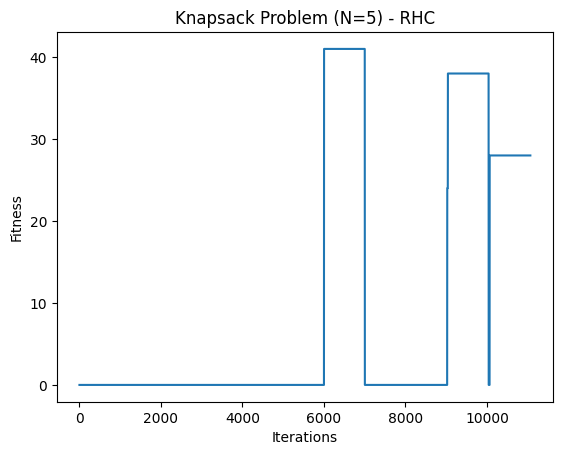

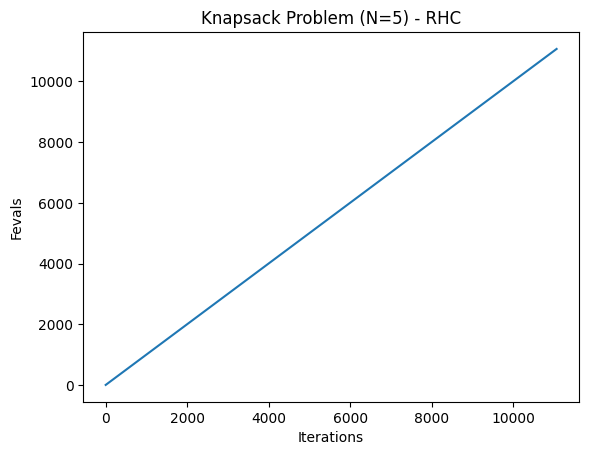

In [200]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5) - RHC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5) - RHC')
plt.show()

In [194]:
problem_10 = KnapsackGenerator().generate(seed=123, number_of_items_types=10, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
rhc_10 = RHCRunner(problem=problem_10,
              experiment_name='knapsack_rhc_10',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              restart_list=[10],
              max_attempts=1000)

start_time = timer()
df_run_stats, df_run_curves = rhc_10.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  33.804994774996885


In [ ]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10) - RHC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10 - RHC')
plt.show()

In [201]:
problem_15 = KnapsackGenerator().generate(seed=123, number_of_items_types=15, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
rhc_15 = RHCRunner(problem=problem_15,
              experiment_name='knapsack_rhc_15',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              restart_list=[10],
              max_attempts=1000)

start_time = timer()
df_run_stats, df_run_curves = rhc_15.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  45.8627723339996


In [204]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
# HTML(best_runs.to_html())

In [205]:
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000313,0.0,0.0,10,10000,0


In [197]:
run_stats_best_run = df_run_stats[(df_run_stats['Fitness'] == 59)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())

,Iteration,Fitness,FEvals,Time,State
11,5000,59.0,6041,10.899194,"[2, 3, 1, 0, 0, 0, 1, 0, 4, 3]"


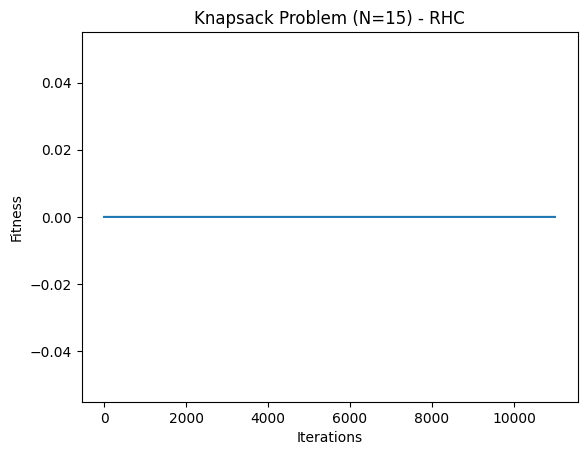

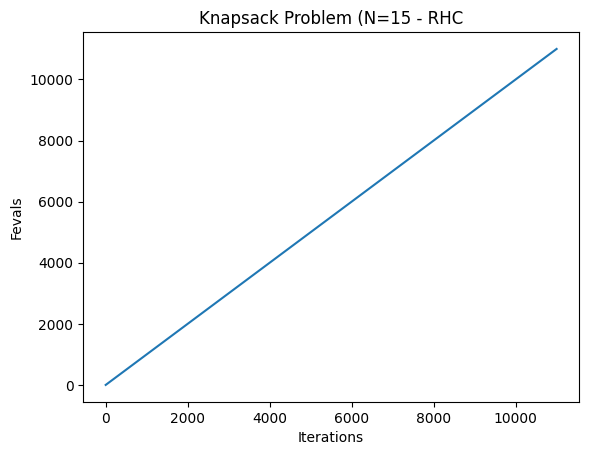

In [206]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15) - RHC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15 - RHC')
plt.show()

In [223]:
# decay = mlrose.ExpDecay(init_temp=.2, exp_const=0.005)
problem_5 = KnapsackGenerator().generate(seed=123, number_of_items_types=5, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
sa_5 = SARunner(problem=problem_5,
              experiment_name='knapsack_sa_5',
              output_directory=None,
              seed=123,
              iteration_list=[1000],
              max_attempts=1000,
              temperature_list=[5],
              decay_list=[mlrose.ExpDecay])

start_time = timer()
df_run_stats, df_run_curves = sa_5.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)


Elapsed time:  2.534751380000671


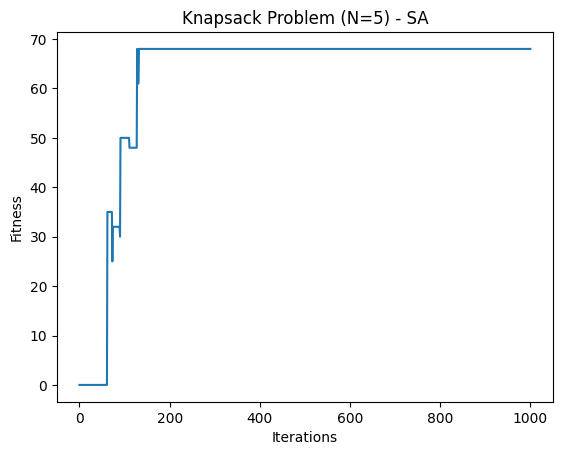

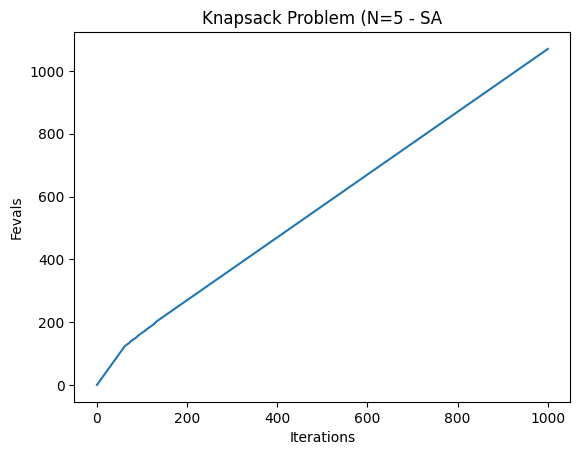

In [224]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5) - SA')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5 - SA')
plt.show()

In [235]:
problem_10 = KnapsackGenerator().generate(seed=123, number_of_items_types=10, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
sa_10 = SARunner(problem=problem_10,
              experiment_name='knapsack_sa_10',
              output_directory=None,
              seed=123,
              iteration_list=[1000],
              max_attempts=100,
              temperature_list=[5],
              decay_list=[mlrose.ExpDecay])

start_time = timer()
df_run_stats, df_run_curves = sa_10.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  0.33964876599929994


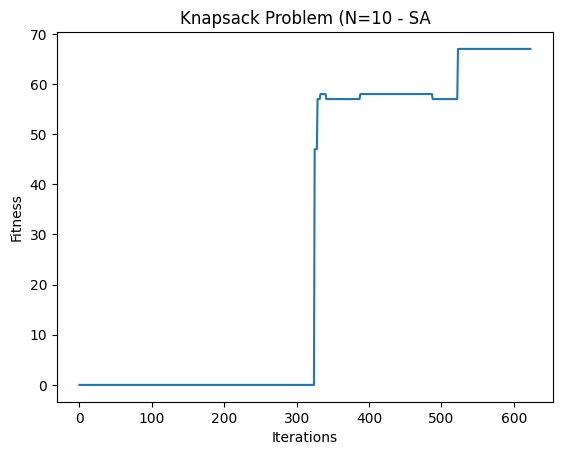

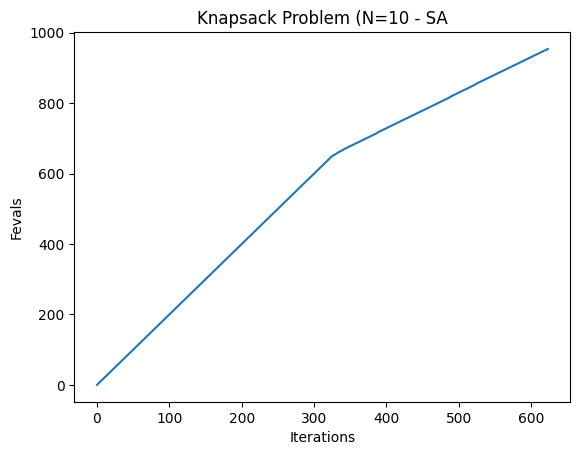

In [234]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10) - SA')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10) - SA')
plt.show()

In [239]:
problem_15 = KnapsackGenerator().generate(seed=123, number_of_items_types=15, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
sa_15 = SARunner(problem=problem_15,
              experiment_name='knapsack_sa_15',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              max_attempts=1000,
              temperature_list=[5],
              decay_list=[mlrose.ExpDecay])

start_time = timer()
df_run_stats, df_run_curves = sa_15.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  32.98890328500056


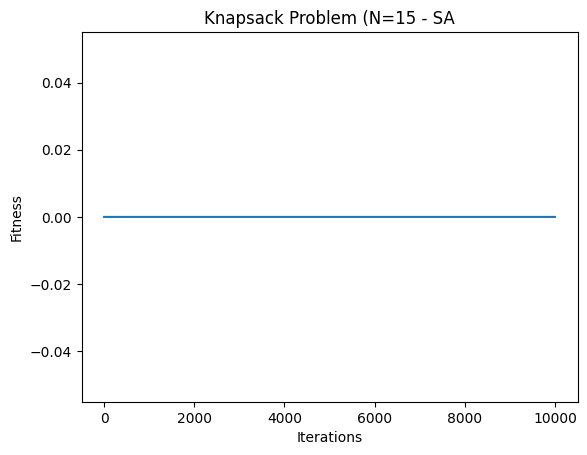

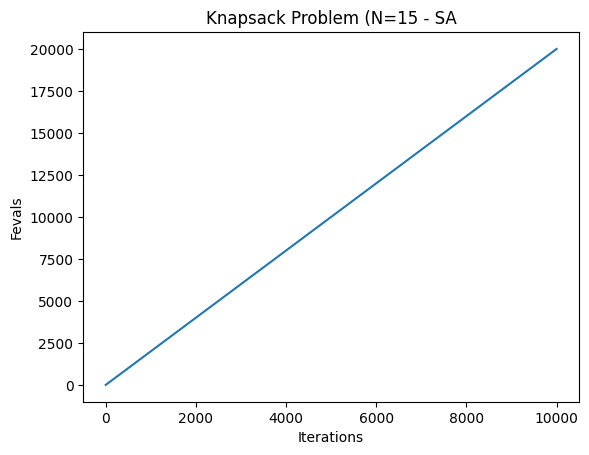

In [240]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15) - SA')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15) - SA')
plt.show()

In [225]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
128,128,0.137314,68.0,196.0,5,1000


In [226]:
run_stats_best_run = df_run_stats[(df_run_stats['Fitness'] == 35)]
HTML(run_stats_best_run[['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].to_html())

,Iteration,Fitness,FEvals,Time,State


In [ ]:
# start_time = timer()
# best_state, best_fitness, fit_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts = 10000, max_iters = 10000,
#                                                       curve=True, random_state = 2)
# elapsed_time = timer() - start_time
# print('Elapsed time: ', elapsed_time)
# print('Best state: ', best_state)
# print('Best fitness: ', best_fitness)

# plt.plot(fit_curve)
# plt.ylabel('Fitness')
# plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 10001, 1000))
# plt.show()

In [252]:
problem_5 = KnapsackGenerator().generate(seed=123, number_of_items_types=5, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
ga_5 = GARunner(problem=problem_5,
              experiment_name='knapsack_ga_5',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              population_sizes=[100],
              mutation_rates=[0.5])

start_time = timer()
df_run_stats, df_run_curves = ga_5.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  6.946818002998043


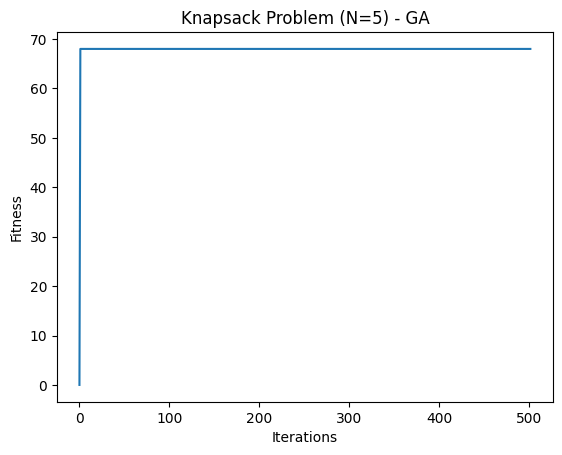

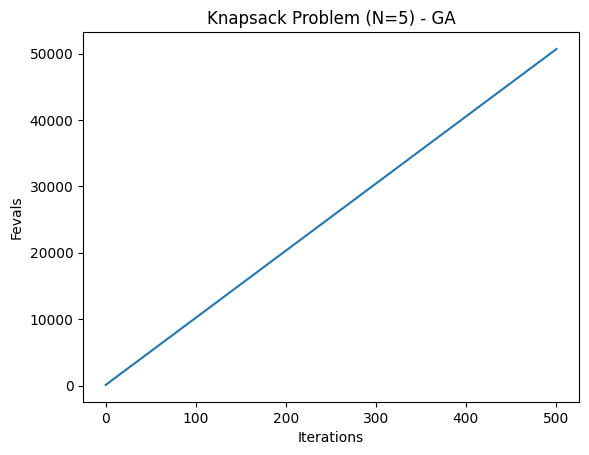

In [253]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5) - GA')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5) - GA')
plt.show()

In [243]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
5818,1,0.008469,68.0,202.0,100,0.5,1024


In [254]:
problem_10 = KnapsackGenerator().generate(seed=123, number_of_items_types=10, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
ga_10 = GARunner(problem=problem_10,
              experiment_name='knapsack_ga_10',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              population_sizes=[100],
              mutation_rates=[0.5])

start_time = timer()
df_run_stats, df_run_curves = ga_10.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  6.039022583001497


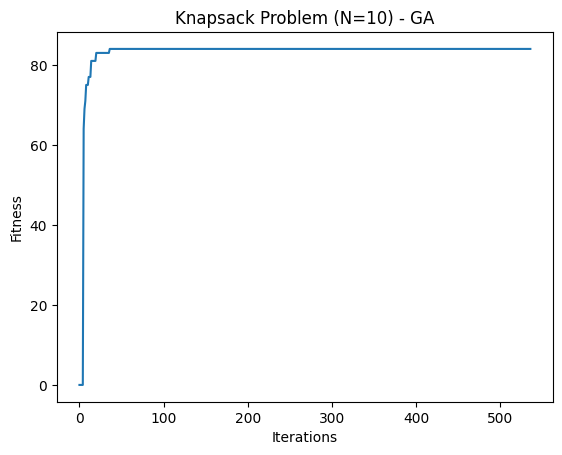

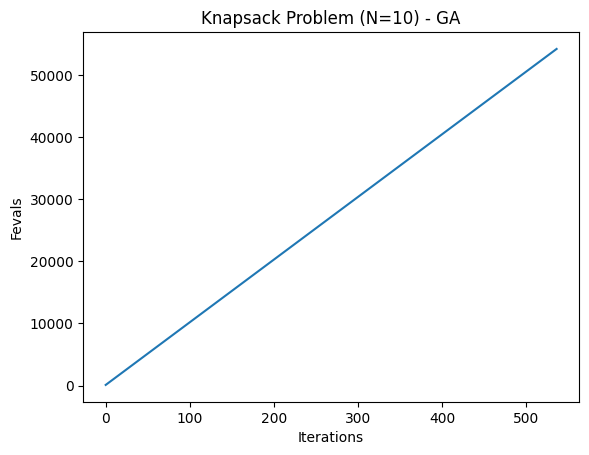

In [255]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10) - GA')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10) - GA')
plt.show()

In [247]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
7918,36,0.13898,84.0,3744.0,100,0.5,1024


In [36]:
problem_15 = KnapsackGenerator().generate(seed=123, number_of_items_types=15, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
ga_15 = GARunner(problem=problem_15,
              experiment_name='knapsack_ga_15',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              population_sizes=[200],
              mutation_rates=[0.5],
              max_attempts=1000)

start_time = timer()
df_run_stats, df_run_curves = ga_15.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

NameError: ignored

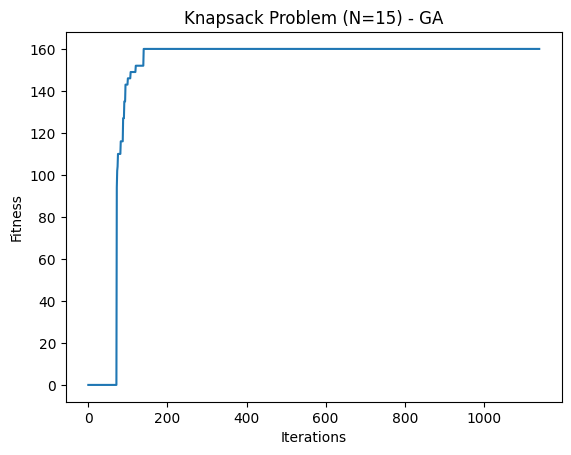

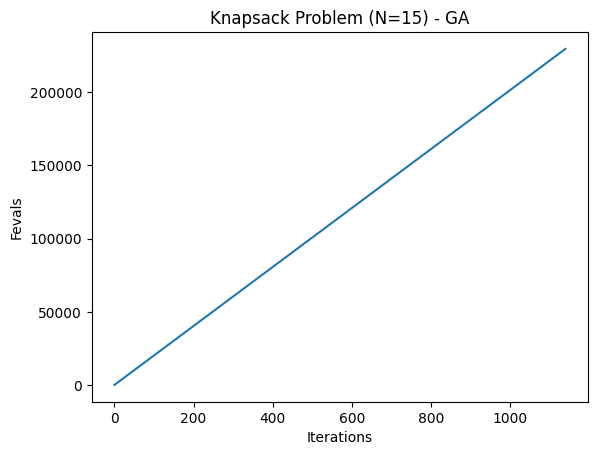

In [282]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15) - GA')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15) - GA')
plt.show()

In [258]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
140,140,2.299723,160.0,28352.0,200,0.5,10000


In [ ]:
# start_time = timer()
# best_state, best_fitness, fit_curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts = 1000, max_iters = 1000,
#                                                       curve=True, random_state = 1, fast_mimic=True)
# elapsed_time = timer() - start_time
# print('Elapsed time: ', elapsed_time)
# print('Best state: ', best_state)
# print('Best fitness: ', best_fitness)

# plt.plot(fit_curve)
# plt.ylabel('Fitness')
# plt.xlabel('Iterations')
# plt.xticks(np.arange(0, 1001, 100))
# plt.show()

In [272]:
problem_5 = KnapsackGenerator().generate(seed=123, number_of_items_types=5, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
mimic_5 = MIMICRunner(problem=problem_5,
              experiment_name='knapsack_mimic_5',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              population_sizes=[200],
              max_attempts = 1000,
              keep_percent_list=[0.2], fast_mimic=True)

start_time = timer()
df_run_stats, df_run_curves = mimic_5.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  23.54822332999902


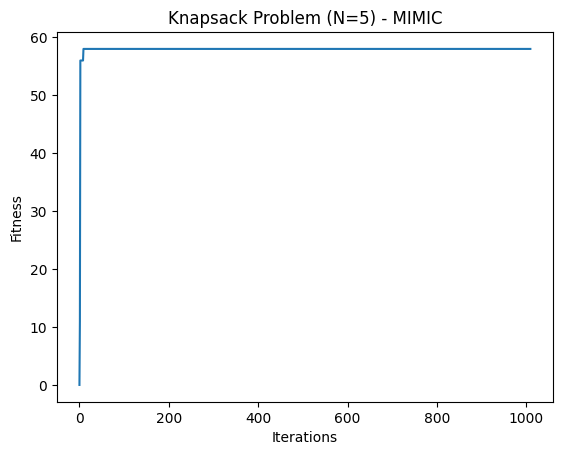

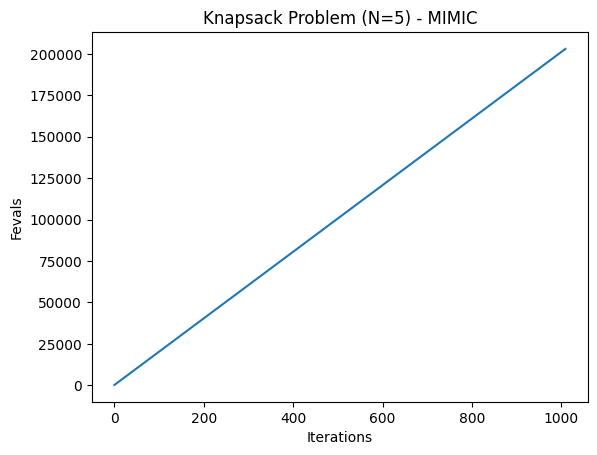

In [274]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5) - MIMIC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=5) - MIMIC')
plt.show()

In [262]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters,fast_mimic
916,1,0.049651,68.0,202.0,False,100,0.1,1024,True
1018,1,0.049651,68.0,202.0,False,100,0.2,1024,True
1120,1,0.049651,68.0,202.0,False,100,0.5,1024,True


In [275]:
problem_10 = KnapsackGenerator().generate(seed=123, number_of_items_types=10, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
mimic_10 = MIMICRunner(problem=problem_10,
              experiment_name='knapsack_mimic_10',
              output_directory=None,
              seed=123,
              iteration_list=[10000],
              population_sizes=[200],
              max_attempts = 1000,
              keep_percent_list=[0.2], fast_mimic=True)

start_time = timer()
df_run_stats, df_run_curves = mimic_10.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

Elapsed time:  64.85183151300225


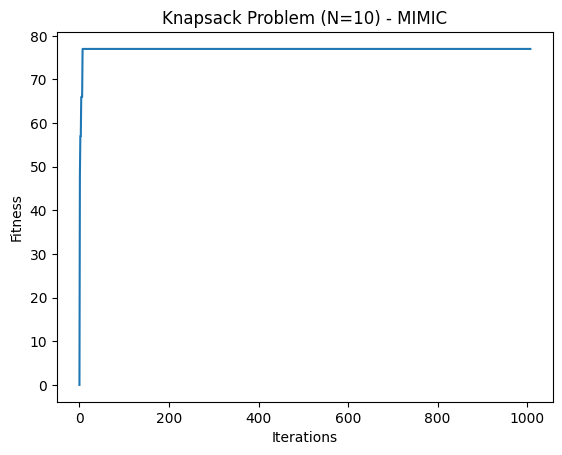

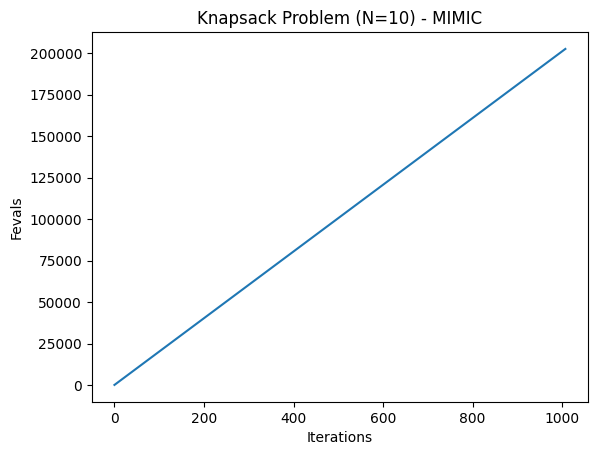

In [276]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10) - MIMIC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=10) - MIMIC')
plt.show()

In [264]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters,fast_mimic
1234,7,1.106951,77.0,1611.0,False,200,0.1,1024,True
1342,7,1.106951,77.0,1611.0,False,200,0.2,1024,True
1450,7,1.106951,77.0,1611.0,False,200,0.5,1024,True


In [41]:
problem_15 = KnapsackGenerator().generate(seed=123, number_of_items_types=15, max_item_count=5, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=False)
mimic_15 = MIMICRunner(problem=problem_15,
              experiment_name='knapsack_mimic_15',
              output_directory=None,
              seed=123,
              iteration_list=2 ** np.arange(11),
              population_sizes=[10, 20, 50, 100, 200],
              max_attempts = 1000,
              keep_percent_list=[0.1, 0.2, 0.5], fast_mimic=True)

start_time = timer()
df_run_stats, df_run_curves = mimic_15.run()
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

TypeError: ignored

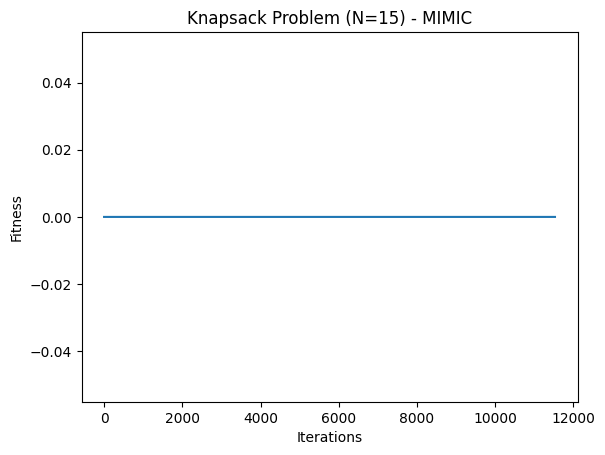

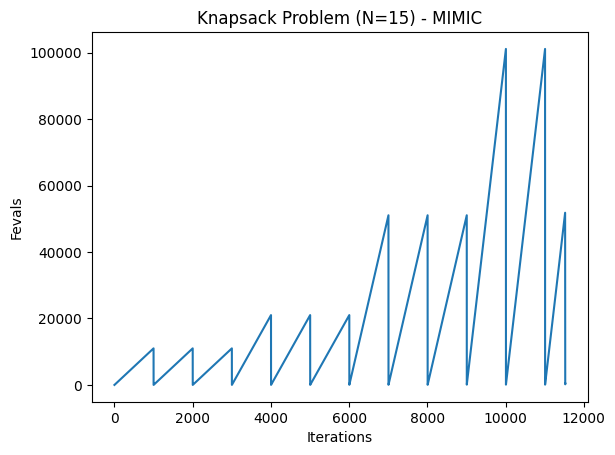

In [293]:
plt.plot(df_run_curves['Fitness'])
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15) - MIMIC')
plt.show()

plt.plot(df_run_curves['FEvals'])
plt.ylabel('Fevals')
plt.xlabel('Iterations')
plt.title('Knapsack Problem (N=15) - MIMIC')
plt.show()

In [ ]:
best_fitness = df_run_curves['Fitness'].max()
best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
minimum_evaluations = best_runs['FEvals'].min()
best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
HTML(best_curve_run.to_html())

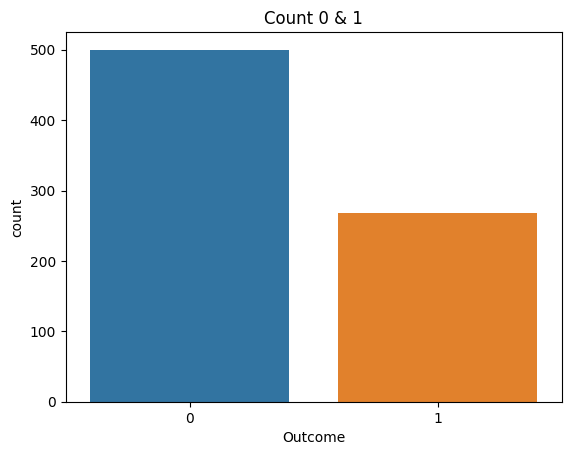

In [4]:
pd.options.mode.chained_assignment = None

sea.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

data_X = data.loc[:, data.columns != "Outcome"]
data_Y = data[["Outcome"]]
# data_X = data_X.drop(['Outcome'], axis = 1)
# data_X.head()

In [5]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size = 0.2, stratify=data_Y, random_state = 0)
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

In [6]:
Q1 = train_X["Pregnancies"].quantile(0.25)
Q3 = train_X["Pregnancies"].quantile(0.75)
q95th = train_X["Pregnancies"].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Pregnancies"] = np.where(train_X["Pregnancies"] > UW,
                                  q95th, train_X["Pregnancies"])

med = train_X["Glucose"].median()
train_X["Glucose"] = np.where(train_X["Glucose"] == 0, med, train_X["Glucose"])



In [7]:
med = train_X["BloodPressure"].median()
q5th = train_X["BloodPressure"].quantile(0.05)
q95th = train_X["BloodPressure"].quantile(0.95)
Q1 = train_X["BloodPressure"].quantile(0.25)
Q3 = train_X["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR

train_X["BloodPressure"] = np.where(train_X["BloodPressure"] == 0,
                                    med, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] < LW,
                                    q5th, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] > UW,
                                    q95th, train_X["BloodPressure"])

In [8]:
med = train_X["SkinThickness"].median()
q95th = train_X["SkinThickness"].quantile(0.95)
Q1 = train_X["SkinThickness"].quantile(0.25)
Q3 = train_X["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["SkinThickness"] = np.where(train_X["SkinThickness"] == 0,
                                    med, train_X["SkinThickness"])
train_X["SkinThickness"] = np.where(train_X["SkinThickness"] > UW,
                                    q95th, train_X["SkinThickness"])

In [9]:
q60th = train_X["Insulin"].quantile(0.60)
q95th = train_X["Insulin"].quantile(0.95)
Q1 = train_X["Insulin"].quantile(0.25)
Q3 = train_X["Insulin"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Insulin"] = np.where(train_X["Insulin"] == 0,
                              q60th, train_X["Insulin"])
train_X["Insulin"] = np.where(train_X["Insulin"] > UW,
                              q95th, train_X["Insulin"])

In [10]:
med = train_X["BMI"].median()
q95th = train_X["BMI"].quantile(0.95)
Q1 = train_X["BMI"].quantile(0.25)
Q3 = train_X["BMI"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["BMI"] = np.where(train_X["BMI"] == 0,
                          med, train_X["BMI"])
train_X["BMI"] = np.where(train_X["BMI"] > UW,
                          q95th, train_X["BMI"])

In [11]:
q95th = train_X["DiabetesPedigreeFunction"].quantile(0.95)
Q1 = train_X["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = train_X["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["DiabetesPedigreeFunction"] = np.where(
                        train_X["DiabetesPedigreeFunction"] > UW,
                        q95th, train_X["DiabetesPedigreeFunction"])

In [12]:
q95th = train_X["Age"].quantile(0.95)
Q1 = train_X["Age"].quantile(0.25)
Q3 = train_X["Age"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Age"] = np.where(train_X["Age"] > UW,
                          q95th, train_X["Age"])


In [13]:
feature_names = train_X.columns
train_X_orig = train_X
train_Y_orig = train_Y
test_X_orig = test_X
test_Y_orig = test_Y


In [14]:
train_X = train_X_orig
train_Y = train_Y_orig
test_X = test_X_orig
test_Y = test_Y_orig

scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X_orig)
test_X = scaler.transform(test_X_orig)
# train_Y.values.ravel()
# print(test_Y_orig.shape)
# encoder = OneHotEncoder()
# train_Y = encoder.fit_transform(train_Y_orig.values.reshape(-1, 1))
# test_Y = encoder.transform(test_Y_orig.values.reshape(-1, 1))

train_X = pd.DataFrame(train_X, columns = feature_names)
test_X = pd.DataFrame(test_X, columns = feature_names)

# train_Y = pd.DataFrame(train_Y)
# test_Y = pd.DataFrame(test_Y)
# train_Y.head()
# print(test_Y.shape)

In [15]:
# corr_matrix = pd.concat([train_X, train_Y], axis=1).corr()
# mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# plt.figure(figsize=(10,8))
# sea.heatmap(corr_matrix,annot=True, fmt=".4f",
#             vmin=-1, vmax=1, linewidth = 1,
#             center=0, mask=mask,cmap="RdBu_r");

In [16]:
train_X.drop("SkinThickness", axis=1, inplace=True)
test_X.drop("SkinThickness", axis=1, inplace=True)

In [17]:
def plot_validation_curve(clf, X, y, param_name, param_range, model_name):
    train_scores, test_scores = validation_curve(clf, X, y,
                                                 cv=4,
                                                 scoring="accuracy",
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 n_jobs=-1)
    plt.figure(figsize=(6,4))
    x_range = param_range
    train_scores_mean =  np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(x_range, train_scores_mean, 'g-', label='Training score')
    plt.plot(x_range, test_scores_mean, 'b-', label='Validation score')
    plt.ylabel('Accuracy Score')
    plt.xlabel(model_name + ": "+ param_name)
    # plt.text(6, 0.8, 'Overfitting',fontsize=12,color="r")
    # plt.text(1, 0.8, 'Underfitting',fontsize=12,color="r")
    plt.legend()
    plt.grid(True)

In [ ]:
!pip install scikeras tensorflow

In [19]:
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense
import keras

keras.utils.set_random_seed(2)

def buildclassifier():
    model = Sequential() #initialize NN
    # print(train_X.shape[1])
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01), input_dim =train_X.shape[1]))
    model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim =train_X.shape[1]))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid'))
    # model.add(Dense(units = 12, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
    # model.add(Dense(units = 8, kernel_initializer = 'uniform',activation = 'relu', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    # model.add(Dense(units = 10, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 4, kernel_initializer = 'uniform',activation = 'relu'))
    # model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid', kernel_regularizer=keras.regularizers.l1(0.01), bias_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l1(0.01)))
    model.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))

    # print(model.summary())
    return model

5/5 [==============================] - 0s 6ms/step - loss: 0.3835 - accuracy: 0.8377


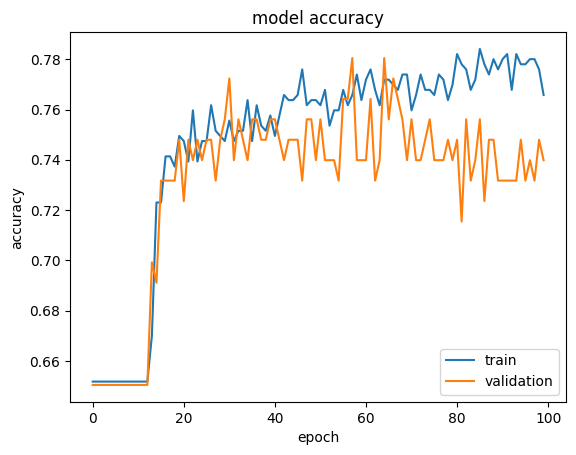

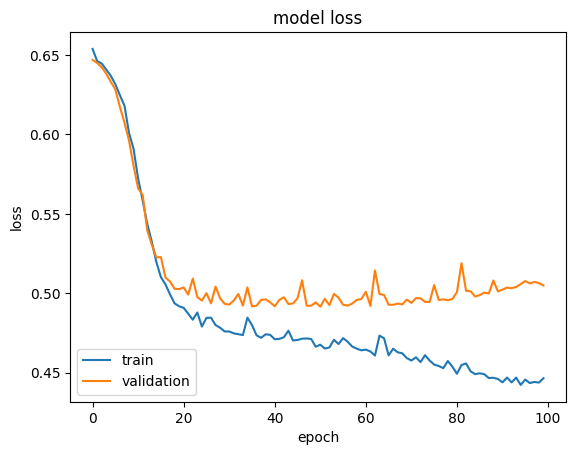

In [20]:
model = buildclassifier()
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_X, train_Y.values, validation_split=0.2, epochs=100, batch_size = 16, verbose=0);
loss, accuracy = model.evaluate(test_X, test_Y)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

5/5 [==============================] - 0s 4ms/step


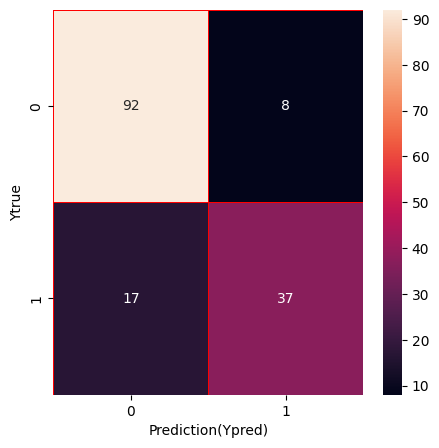

              precision    recall  f1-score   support

Not Diabetes     0.8440    0.9200    0.8804       100
    Diabetes     0.8222    0.6852    0.7475        54

    accuracy                         0.8377       154
   macro avg     0.8331    0.8026    0.8139       154
weighted avg     0.8364    0.8377    0.8338       154



In [21]:
Y_pred = model.predict(test_X)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))

In [22]:
one_hot = OneHotEncoder()
y_train_hot = one_hot.fit_transform(train_Y.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(test_Y.values.reshape(-1, 1)).todense()

grid_search_parameters = {
    'max_iters': [1000],                          # nn params
    'learning_rate': [0.01],                       # nn params
    'activation': [mlrose.sigmoid],            # nn params
    'restarts': [1],                             # rhc params
}

nn_rhs = NNGSRunner(
    x_train=train_X,
    y_train=y_train_hot,
    x_test=test_X,
    y_test=y_test_hot,
    experiment_name='nn_rhc',
    algorithm=mlrose.algorithms.rhc.random_hill_climb,
    grid_search_parameters=grid_search_parameters,
    iteration_list=[1, 10, 50, 100, 250, 500, 1000],
    hidden_layer_sizes=[[9, 9]],
    bias=True,
    early_stopping=True,
    clip_max=5,
    max_attempts=1000,
    n_jobs=5,
    seed=123456,
    output_directory=None
)

run_stats_df, curves_df, cv_results_df, grid_search_cv = nn_rhs.run()


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [23]:
y_test_pred = grid_search_cv.predict(test_X)
y_test_accuracy = accuracy_score(np.asarray(y_test_hot), y_test_pred)
print(y_test_accuracy)

0.6558441558441559


In [53]:
rhc_nn_model = mlrose.NeuralNetwork(hidden_nodes = [9, 9], activation = 'sigmoid',
                                    algorithm = 'random_hill_climb',
                                    max_iters = 10000, bias = True, is_classifier = True,
                                    learning_rate = 0.1, early_stopping = False, restarts=10,
                                    max_attempts = 100, clip_max = 5, random_state = 1)

start_time = timer()
rhc_nn_model.fit(train_X, train_Y)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)
train_Y_pred = rhc_nn_model.predict(train_X)
Y_train_accuracy = accuracy_score(train_Y, train_Y_pred)
print(Y_train_accuracy)


Elapsed time:  230.00800601299943
0.7833876221498371


In [54]:
test_Y_pred = rhc_nn_model.predict(test_X)
Y_test_accuracy = accuracy_score(test_Y, test_Y_pred)
print(Y_test_accuracy)

0.8246753246753247


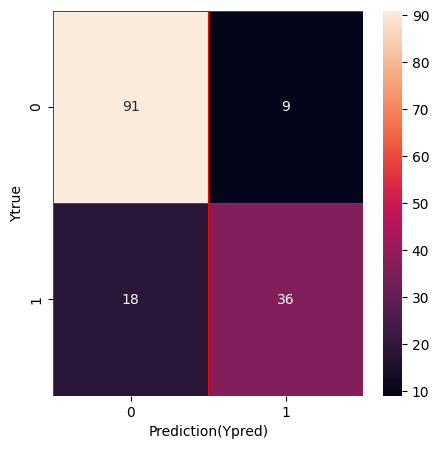

              precision    recall  f1-score   support

Not Diabetes     0.8349    0.9100    0.8708       100
    Diabetes     0.8000    0.6667    0.7273        54

    accuracy                         0.8247       154
   macro avg     0.8174    0.7883    0.7990       154
weighted avg     0.8226    0.8247    0.8205       154



In [55]:
Y_pred = rhc_nn_model.predict(test_X)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))

In [72]:
decay = mlrose.ExpDecay(init_temp=5, exp_const=0.005)
sa_nn_model = mlrose.NeuralNetwork(hidden_nodes = [9, 9], activation = 'sigmoid',
                                    algorithm = 'simulated_annealing', schedule = decay,
                                    max_iters = 10000, bias = True, is_classifier = True,
                                    learning_rate = 0.1, early_stopping = False,
                                    max_attempts = 1000, random_state = 1)
start_time = timer()
sa_nn_model.fit(train_X, train_Y)
elapsed_time = timer() - start_time
print('Elapsed time: ', elapsed_time)

train_Y_pred = sa_nn_model.predict(train_X)
Y_train_accuracy = accuracy_score(train_Y, train_Y_pred)
print(Y_train_accuracy)

Elapsed time:  29.96227459000147
0.6514657980456026


In [73]:
test_Y_pred = sa_nn_model.predict(test_X)
Y_test_accuracy = accuracy_score(test_Y, test_Y_pred)
print(Y_test_accuracy)

0.6493506493506493


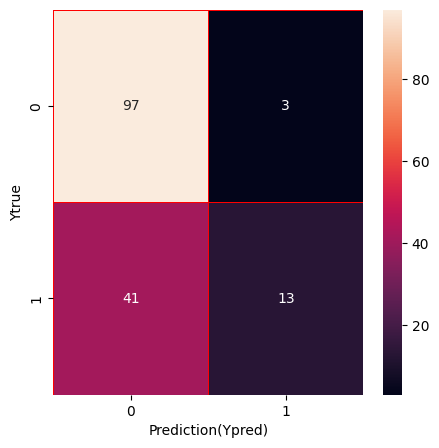

              precision    recall  f1-score   support

Not Diabetes     0.7029    0.9700    0.8151       100
    Diabetes     0.8125    0.2407    0.3714        54

    accuracy                         0.7143       154
   macro avg     0.7577    0.6054    0.5933       154
weighted avg     0.7413    0.7143    0.6595       154



In [67]:
Y_pred = sa_nn_model.predict(test_X)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))

In [74]:
gen_nn_model = mlrose.NeuralNetwork(hidden_nodes = [9, 9], activation = 'sigmoid',
                                    algorithm = 'genetic_alg', pop_size=200, mutation_prob=0.2,
                                    max_iters = 1000, bias = True, is_classifier = True,
                                    learning_rate = 0.01, early_stopping = False,
                                    clip_max = 5, max_attempts = 100, random_state = 1)
start_time = timer()
gen_nn_model.fit(train_X, train_Y)
elapsed_time = timer() - start_time
print('Training time: ', elapsed_time)

start_time = timer()
train_Y_pred = gen_nn_model.predict(train_X)
Y_train_accuracy = accuracy_score(train_Y, train_Y_pred)
print(Y_train_accuracy)

Training time:  352.803226991
0.7687296416938111


In [75]:
start_time = timer()
test_Y_pred = gen_nn_model.predict(test_X)
elapsed_time = timer() - start_time
print('Prediction time: ', elapsed_time)
Y_test_accuracy = accuracy_score(test_Y, test_Y_pred)
print(Y_test_accuracy)

Prediction time:  0.0019299160012451466
0.8246753246753247


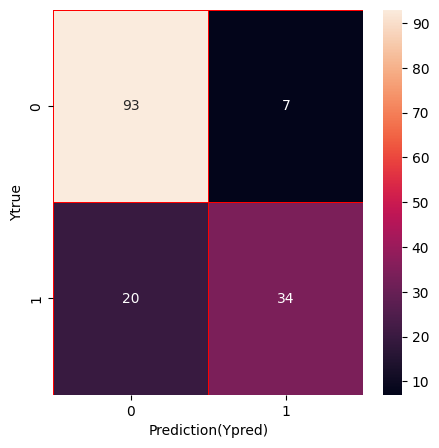

              precision    recall  f1-score   support

Not Diabetes     0.8230    0.9300    0.8732       100
    Diabetes     0.8293    0.6296    0.7158        54

    accuracy                         0.8247       154
   macro avg     0.8261    0.7798    0.7945       154
weighted avg     0.8252    0.8247    0.8180       154



In [76]:
Y_pred = gen_nn_model.predict(test_X)
Y_pred = np.around(Y_pred)
CM = confusion_matrix(test_Y, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sea.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

print(classification_report(test_Y, Y_pred,
                            digits = 4,
                            target_names=["Not Diabetes",
                                         "Diabetes"]))